# Bedmap2 Grids
**Description:**  Gridded data in EPSG 3031 projection. Topographic layers, uncertainties, and masks.

**Dataset:** 

N.A. 

**Associated paper:** 

Fretwell, P., H. D. Pritchard, D. G. Vaughan, J. L. Bamber, N. E. Barrand, R. E. Bell, C. Bianchi, et al. “Bedmap2: Improved Ice Bed, Surface and Thickness Datasets for Antarctica.” The Cryosphere 7, no. 1 (2013): 375–93. https://doi.org/10.5194/tc-7-375-2013.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2


from polartoolkit import fetch, maps, regions, utils

In [9]:
layer_names = [
    # topographies
    "surface",
    "icebase",
    "bed",
    # thicknesses
    "ice_thickness",
    "water_thickness",
    # uncertainties
    "grounded_bed_uncertainty",
    "ice_thickness_uncertainty",
    # others
    "coverage",
    "icemask_grounded_and_shelves",
    "rockmask",
    "gl04c_geiod_to_WGS84",
    "lakemask_vostok",
]

grids = []
for name in layer_names:
    data = fetch.bedmap2(
        layer=name,
        # available options
        # reference ("eigen-gl04c" or "ellipsoid")
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
        # fill_nans (True or False),
    )
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

Info for surface
grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 1.0
grid zmax: 4082.0
grid registration: g
##########
Info for icebase
grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: -2736.0
grid zmax: 3972.0
grid registration: g
##########
Info for bed
grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: -7054.0
grid zmax: 3972.0
grid registration: g
##########
Info for ice_thickness
grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 0.0
grid zmax: 4621.0
grid registration: g
##########
Info for water_thickness
grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: -1180.0
grid zmax: 2694.0
grid registration: g
##########
Info for grounded_bed_uncertainty
grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 0.0
grid zmax: 65535.0
gr

In [ ]:
layer_names = [
    # topographies
    "surface",
    "icebase",
    "bed",
    # thicknesses
    "ice_thickness",
    "water_thickness",
    # uncertainties
    "grounded_bed_uncertainty",
    "ice_thickness_uncertainty",
    # others
    "coverage",
    "icemask_grounded_and_shelves",
    "rockmask",
    "gl04c_geiod_to_WGS84",
    "lakemask_vostok",
]

makecpt [ERROR]: Option T: min >= max
makecpt [ERROR]: Option T: min >= max
makecpt [ERROR]: Option T: min >= max
makecpt [ERROR]: Option T: min >= max
makecpt [ERROR]: Option T: min >= max
makecpt [ERROR]: Option T: min >= max


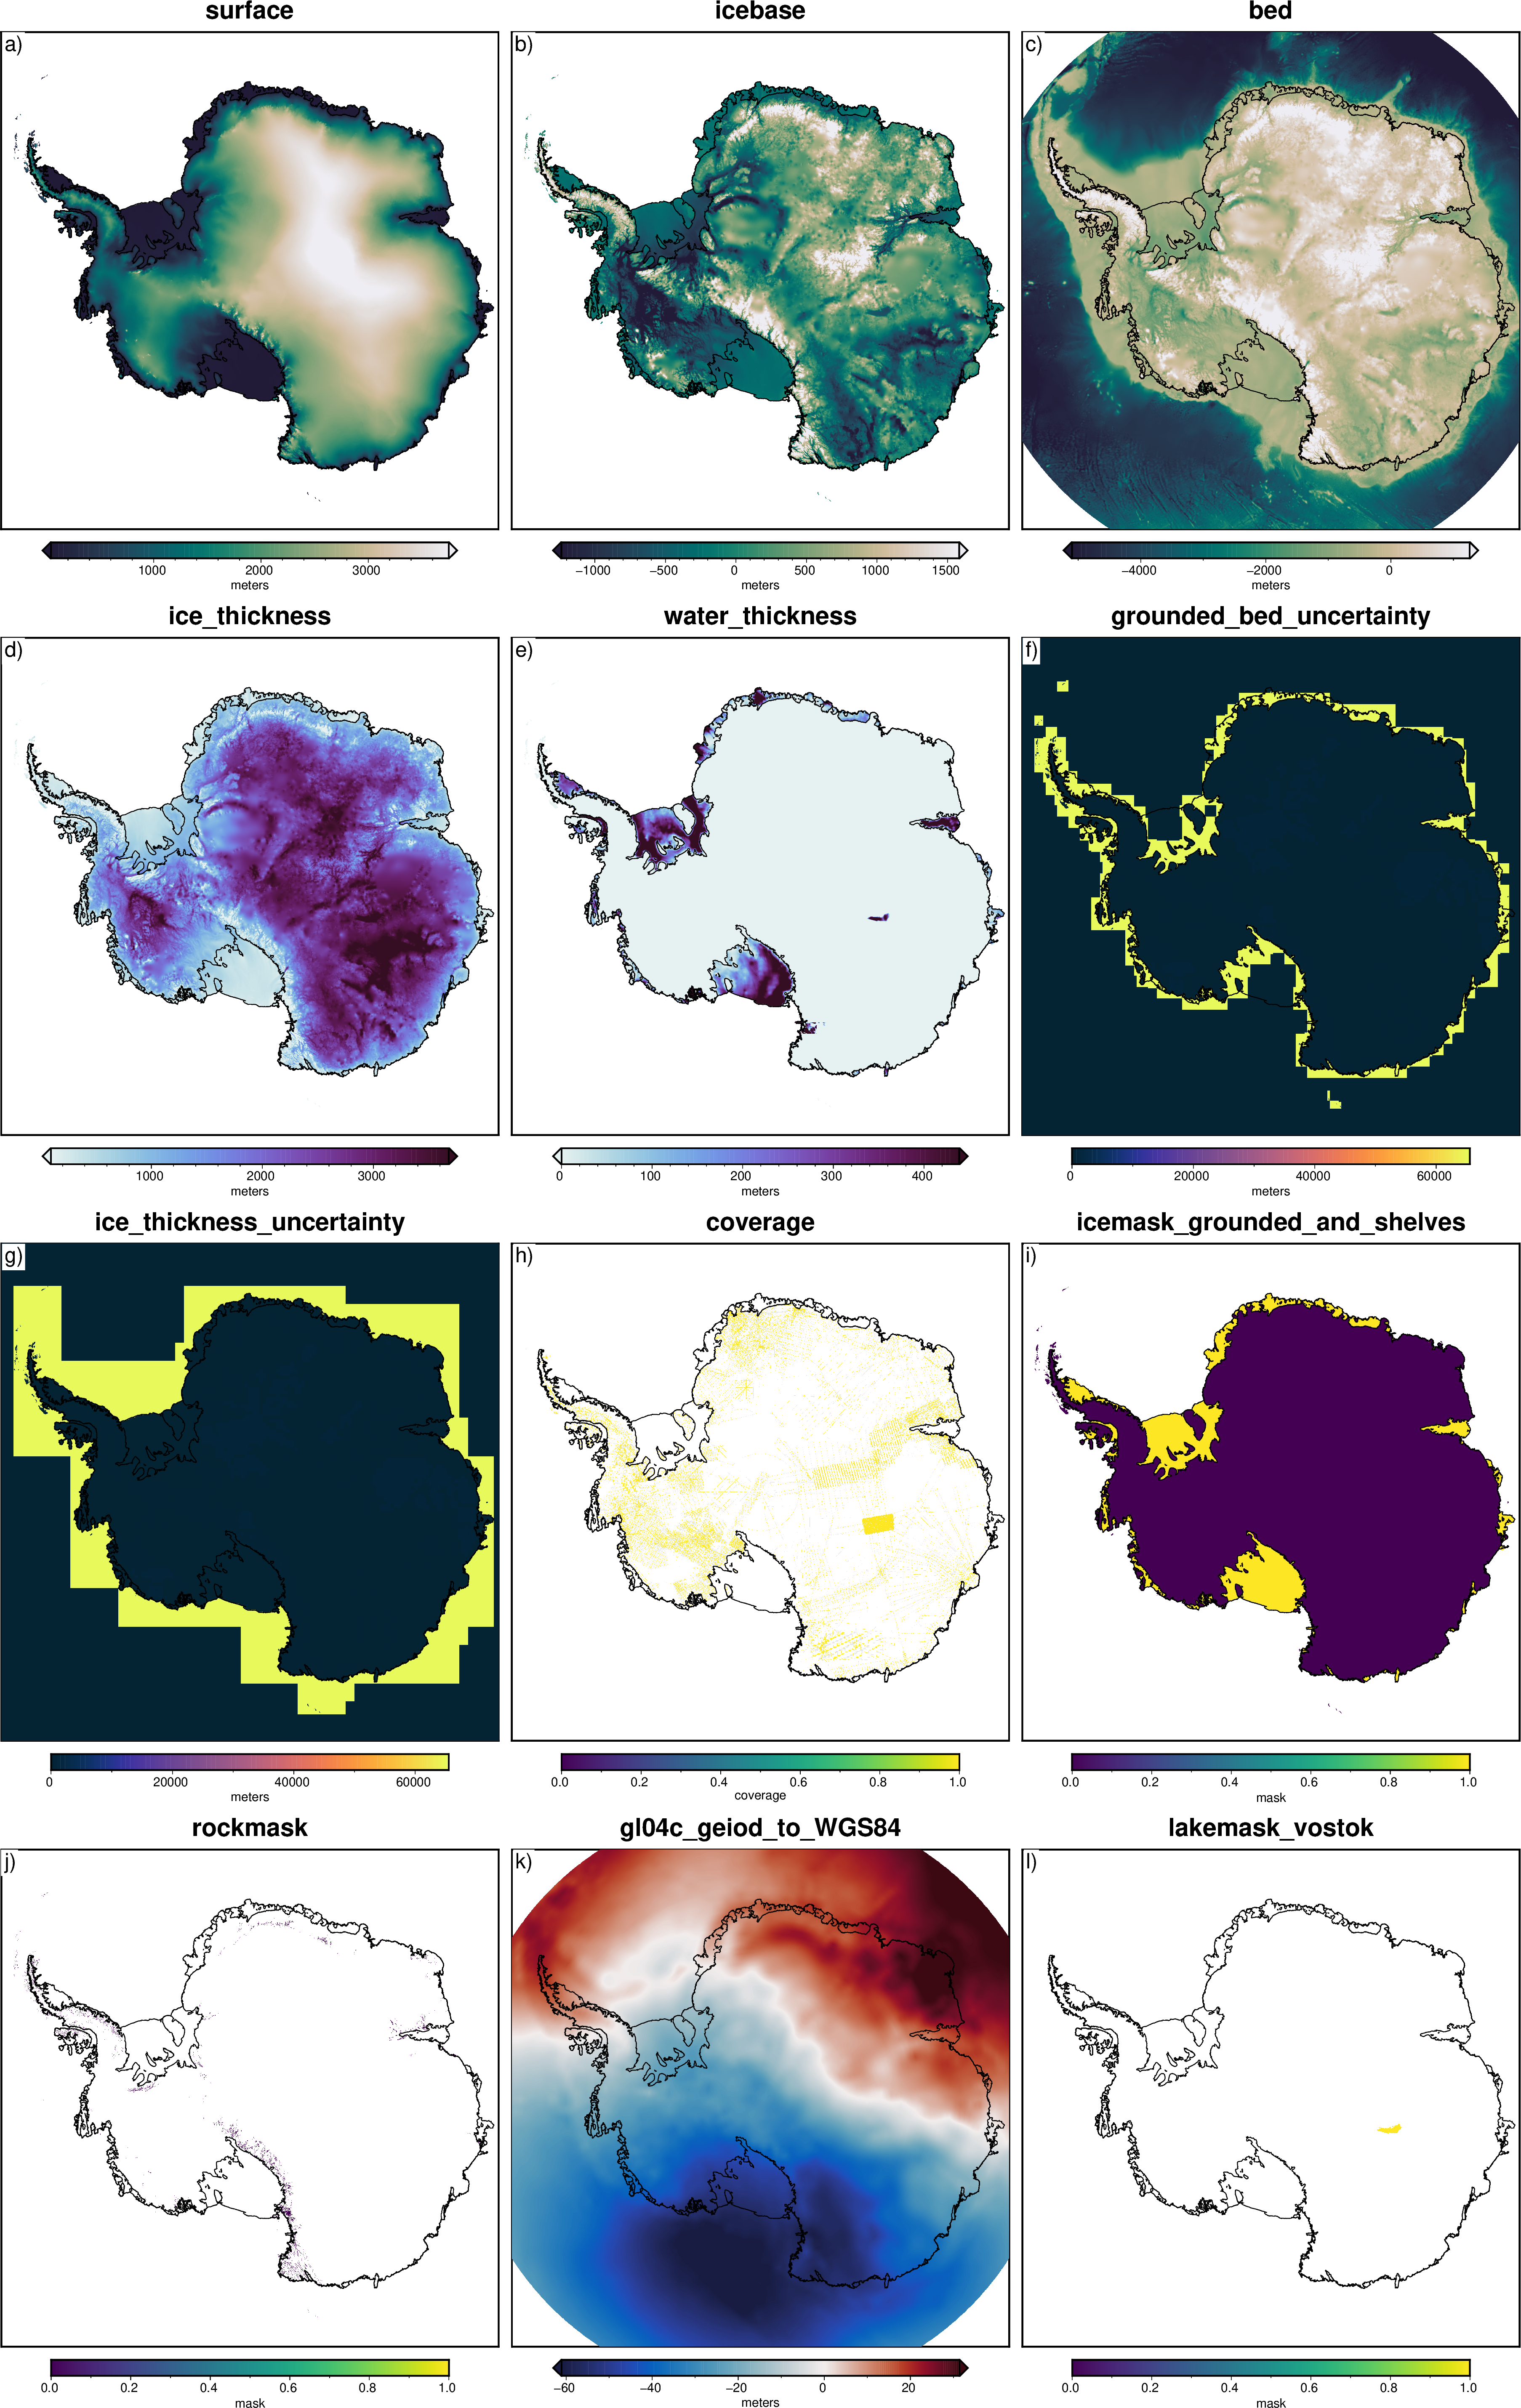

In [8]:
titles = layer_names
cmaps = [
    "rain",
    "rain",
    "rain",
    "dense",
    "dense",
    "thermal",
    "thermal",
    "viridis",
    "viridis",
    "viridis",
    "balance+h0",
    "viridis",
]
cbar_labels = ["meters"] * 7 + ["coverage", "mask", "mask", "meters", "mask"]

reverse_cpts = [True] * 3 + [False] * 9

fig = maps.subplots(
    grids,
    titles=titles,
    cmaps=cmaps,
    reverse_cpts=reverse_cpts,
    cbar_labels=cbar_labels,
    region=regions.antarctica,
    # hist=True,
    coast=True,
    robust=True,
    hemisphere="south",
)
fig.show(dpi=200)